In [1]:
!pip install FastAI

In [2]:
from fastai.vision.all import *  # fastai의 vision 라이브러리 전체 사용
import matplotlib.pyplot as plt  # 그래프를 띄우기 위해 matplotlib 임포트

In [3]:
# 데이터셋 로드
path = untar_data(URLs.PETS)  # PETS 데이터셋 다운로드 및 압축 해제
path_imgs = path/'images'

In [4]:
# 이미지 파일 라벨링 함수 정의
def is_cat(x): return x[0].isupper()

In [5]:
# 데이터블록 정의
dls = ImageDataLoaders.from_name_func(
    path_imgs, get_image_files(path_imgs), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224))

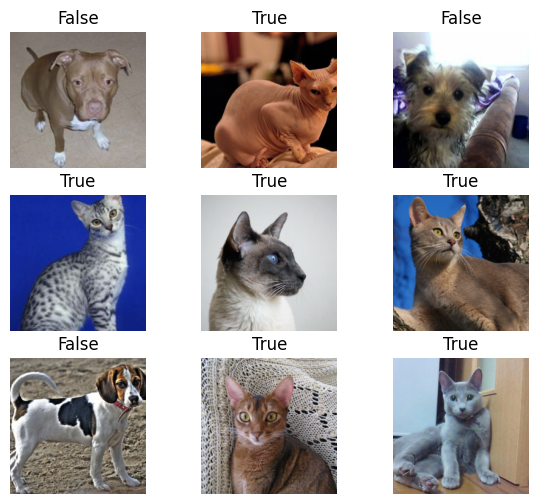

In [6]:
# 데이터셋 확인
dls.show_batch(max_n=9, figsize=(7, 6))
plt.show()  # 그래프 띄우기

In [7]:
# ResNet34 사전 학습된 모델을 사용해 학습기 생성
learn = cnn_learner(dls, resnet34, metrics=error_rate)

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:303: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 129MB/s]


/usr/local/lib/python3.10/dist-packages/fastai/learner.py:53: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(file, map_location=device, **torch_load_kwargs

SuggestedLRs(valley=0.0003981071640737355)

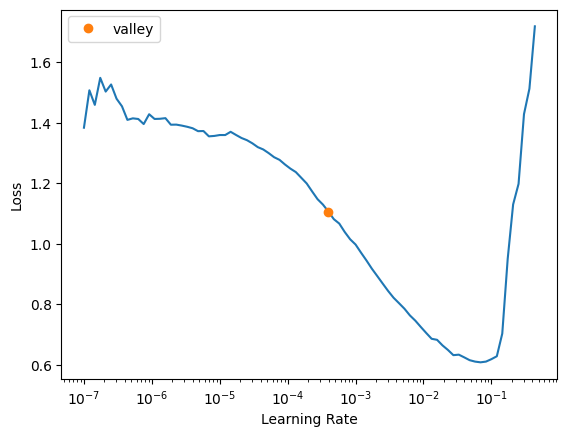

In [8]:
# 학습률 찾기 (최적의 학습률을 자동으로 찾아줌)
learn.lr_find()

In [9]:
# 모델 학습 (사전 학습된 모델에 대해 파인 튜닝)
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,0.156131,0.051362,0.012179,00:46


epoch,train_loss,valid_loss,error_rate,time
0,0.054796,0.059081,0.014208,00:49
1,0.031758,0.012326,0.004060,00:49
2,0.018507,0.009568,0.004060,00:48


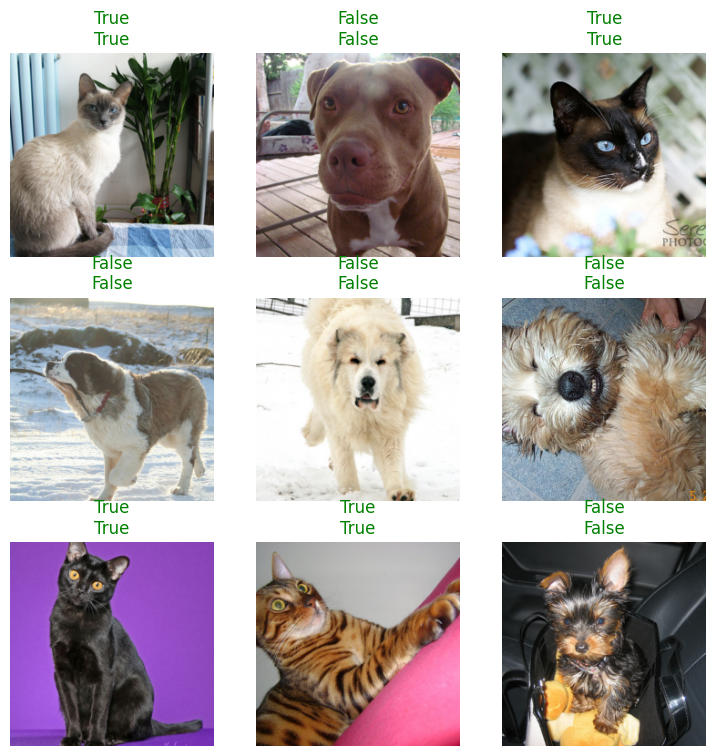

In [10]:
# 모델 평가
learn.show_results()

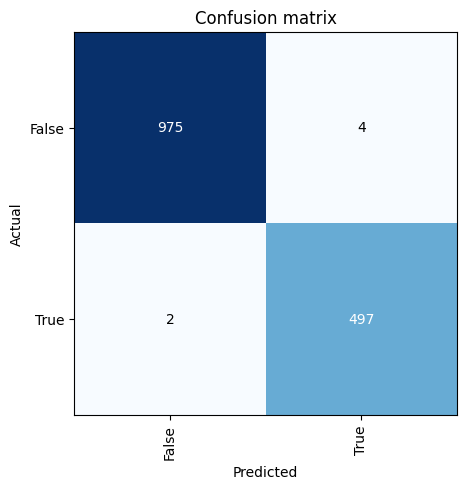

In [11]:
# 혼동 행렬 (Confusion Matrix) 출력
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [12]:
# 새로운 이미지에 대한 예측
img = PILImage.create('/content/drive/MyDrive/cat.jpeg')
pred, _, probs = learn.predict(img)

Prediction: True, Probability: 1.0000


<Axes: >

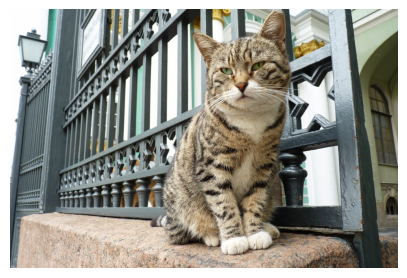

In [13]:
# 결과 출력
print(f"Prediction: {pred}, Probability: {probs.max():.4f}")
img.show()